Here, I'll walk through the exercises in [section 8](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html) of the documentation for the [neurodynex](https://pypi.python.org/pypi/neurodynex/) Python software package for simulating spiking neural networks. The associated reading material is found in [Chapter 17.2](http://neuronaldynamics.epfl.ch/online/Ch17.S2.html) of [Neuronal Dynamics](http://neuronaldynamics.epfl.ch/index.html).

# Hopfield Network Model of Associative Memory

#### Python classes

Hopfield networks can be analyzed mathematically. In this Python exercise, we focus on visualization and simulation to develop our intuition about the dynamics of Hopfield networks.

The neurodynex package provides several functions useful for creating patterns, storing them in the network, and visualizing the network dynamics. Check out the modules `hopfield_network.network`, `hopfield_network.pattern_tools`, and `hopfield_network.plot_tools` to learn the building blocks which are provided.

If you instantiate a new object of class `hopfield_network.network.HopfieldNetwork`, its default dynamics are __deterministic__ and __synchronous__. That is, all states are updated at the same time using the sign function. We use these dynamics in the exercises below.

Below is a brief overview of the documentation of these modules.

#### `neurodynex.hopfield_network.network` module

This file implements a Hopfield network. It provides functions to set and retrieve the network state and store patterns.

__class neurodynex.hopfield_network.network.HopfieldNetwork(_nrNeurons_)__
    Implements a Hopfield neural network.

- nrOfNeurons (_int_): Number of neurons
- weights (_numpy.ndarray_ ): nrOfNeurons x nrOfNeurons matrix of weights
- state (_numpy.ndarray_)): Current network state. nrofNeurons x nrOfNeurons matrix of activations.
- iterate(): Executes on step of the network's dynamics.
- reset_weights(): Resets the network's weights to random values.
- run(nr_steps=5): Runs the dynamics. Params: __nr_steps__(_float, optional_): timesteps to simulate.
- run_with_monitoring(nr_steps=5): Runs the dynamics and saves the network activations after every iteration. Params: __nr_steps__(_float, optional_): timesteps to simulate. Returns: a list of 2D network states (of type _numpy.ndarray_).
- set_dynamics_sign_async(): Sets the update dynamics to the g(h) = sign(h) functions. Neurons are updated asynchronously in random order.
- set_dynaimcs_sign_sync(): Sets the update dynaimcs to the g(h) = sign(h) functions. Neurons are updated in sequential order.
- set_dynamics_to_user_function(_update_function_). Params: __update_function__: upd(state_t0, weights) -> state_t1. Any function mapping a state s0 to the next state s1 using a function of s0 and the network weights.
- set_state_from_pattern(_pattern_): Sets the neuron states to the pattern's pixels. The pattern is a flattened _numpy.ndarray_. Params: __pattern__: 0s and 1s pixelated pattern.
- store_patterns(_pattern_list_): Learns the patterns by setting the networks weights. The patterns themselves are not store, only the weights are updated. Self connections are set to 0. Params: __pattern_list__: a non-empty list of flattened patterns.

#### `neurodynex.hopfield_network.pattern_tools` module

Functions to create 2D patterns. Note, in the Hopfield model, we define patterns as vectors. To make the exercises more visual, we use 2D patterns (N by N ndarrays).

__class neurodynex.hopfield_network.pattern_tools.PatternFactory(pattern_length, pattern_width=None)__
    Creates square patterns of size pattern_length x pattern_width. If the pattern length is omitted, square patterns are produced.

__neurodynex.hopfield_network.pattern_tools.compute_overlap(pattern1, pattern2)__
    Computes the overlap between two patterns.
    
__neurodynex.hopfield_network.pattern_tools.compute_overlap_list(reference_pattern, pattern_list)__
    Computes the overlap between the reference_pattern and each pattern in pattern_list
    
__neurodynex.hopfield_network.pattern_tools.compute_overlap_matrix(pattern_list)__
    For each pattern, it computes the overlap to all other patterns.
    
__neurodynex.hopfield_network.pattern_tools.flip_n(template, nr_of_flips)__
    Makes a copy of the template pattern and flips exactly n randomly selected states.

__neurodynex.hopfield_network.pattern_tools.get_noisy_copy(template, noise_level)__
    Creates a copy of the template pattern and reassigns N pixels. N is determined by the noise_level. Note: reassigning a random value is not the same as flipping the state. This function reassigns a random value.

__neurodynex.hopfield_network.pattern_tools.get_pattern_diff(pattern1, pattern2, diff_code=0)__
    Creates a new pattern of same size as the two patterns. The "diff" pattern has the values pattern1 = pattern2 where the two patterns have the same value. Locations that differ between the two patterns are set to "diff_code" (default = 0).

__neurodynex.hopfield_network.pattern_tools.load_alphabet()__
    Load alphabet dictionary from the file `data/alphabet.pickle.gz`, which is included in the neurodynex release.
    
__neurodynex.hopfield_network.pattern_tools.reshape_patterns(pattern_list, shape)__
    Reshapes each pattern in "pattern_list" to the given shape.
    
#### `neurodynex.hopfield_network.plot_tools` module

Helper tools to visualize patterns and network state.

__neurodynex.hopfield_network.plot_tools.plot_nework_weights(hopfield_network, color_map='jet')__
    Visualizes the network's weight matrix.
    
__neurodynex.hopfield_network.plot_tools.plot_overlap_matrix(overlap_matrix, color_map='bwr')__
    Visualizes the pattern overlap.
    
__neurodynex.hopfield_network.plot_tools.plot_pattern(pattern, reference=None, color_map='brg', diff_code=0)__
    Plots the pattern. If an (optional) reference pattern is given, the pattern is plotted with differences highlighed.
    
__neurodynex.hopfield_network.plot_tools.plot_pattern_list(pattern_list, color_map='brg')__
    Plots a list of patterns.
    
__neurodynex.hopfield_network.plot_tools.plot_state_sequence_and_overlap(state_sequence, pattern_list, reference_idx, color_map='brg', suptitle=None)__
    For each time point t (the index of "state_sequence"), plots the sequence of states and the overlap (barplot) between state t and each pattern. 

## 8.1. Getting Started

I ran the code provided from the tutorial, reading the comments and corresponding documentation along the way. The patterns and the flipped pixels are randomly chosen, therefore, the results change each time the code is executed. Run the code several times, changing the parameters like *nr\_patterns* and *nr\_of\_flips* as you go.

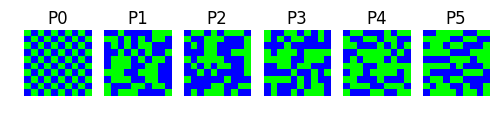

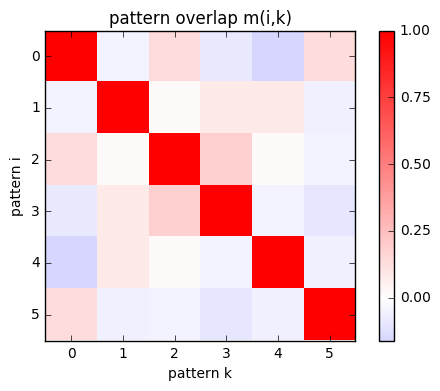

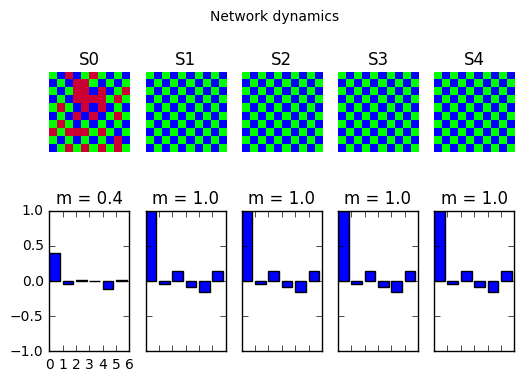

In [1]:
# enables plotting inline of Jupyter notebooks
%matplotlib inline

# importing Hopfield network, pattern creation tools, and pattern plotting tools
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import matplotlib.pyplot as plt

# setting the size of the patterns (pattern_size x pattern_size)
pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size ** 2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard patterns? check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the Hopfield network "learn" the patterns. note: the patterns aren't stored explicitly,
# only network weights are updated
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use it to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=30)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it into the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.2. Introduction: Hopfield Networks

This exercise uses a model in which neurons are pixels and take the value of $\pm 1$, corresponding to on / off states. The network can store a certain number of pixel patterns, which is to be investigated in this exercise. During a retrieval phase, the network is initialized with some initial condition and the network dynamics evolve toward the stored pattern (called an attractor) that is closest to the initial configuration.

The dynamics is of the equation:

<center>$S_i(t + 1) = \text{sign}(\sum_j w_{i, j}S_j(t))$</center>

In the Hopfield model, each neuron is connected to every other neuron (this is called full connectivity). The connection matrix is then:

<center>$w_{i, j} = \frac{1}{N}\sum_{\mu = 1}^P p_i^\mu p_j^\mu$,</center>

where $N$ is the number of neurons in the network, $p_i^\mu$ is the value of neuron $i$ in pattern number $\mu$, and the sum is over all patterns from $\mu = 1$ to $P$. This is a simple correlation-based rule (called Hebbian learning). Since it is not an iterative rule it is sometimes called one-shot learning. The learning rule works best if the patterns to be stored are random patterns with equal probability for the on and off states ($\pm 1$). In large networks (as $N \rightarrow \infty$), the number of random patterns that can be stored is approximately a 14% fraction of $N$.

## 8.3. Exercise: 4x4 Hopfield Network

We study how a Hopfield network stores and retrieves patterns. Using a small network of 16 neurons allows us to have a close look at the network weights and dynamics.

### 8.3.1. Question: Storing a single pattern

Modify the python code above to implement the following exercise.

1. Create a network with 16 neurons.
2. Create a single 4x4 checkerboard pattern.
3. Store the checkerboard in the network.
4. Set the initial state of the network to a noisy version of the checkerboard, with *nr\_flipped\_pixels* = 5.
5. Let the network dynamics evolve for 4 iterations.
6. Plot the sequence of network states along with the overlap of network states with the checkerboard.

We also test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at *nr\_flipped\_pixels* = 8 or *nr\_flipped\_pixels* > 8?

### With *nr\_flipped\_pixels* = 5...

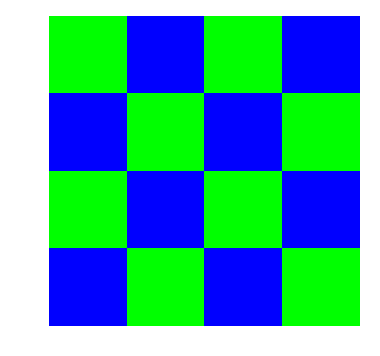

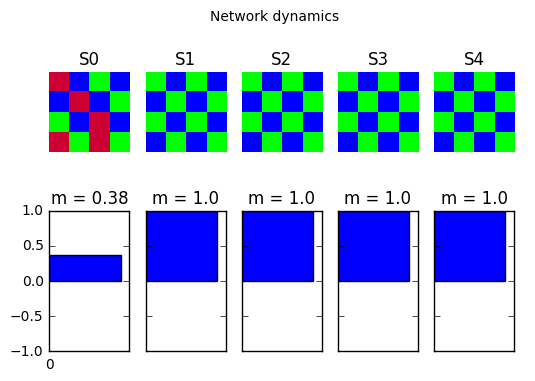

In [2]:
# setting the size of the patterns (pattern_size x pattern_size)
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size ** 2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()

# plot the checkerboard pattern
plot_tools.plot_pattern(checkerboard)

# let the Hopfield network "learn" the patterns. note: the patterns aren't stored explicitly,
# only network weights are updated
hopfield_net.store_patterns([checkerboard])

# create a noisy version of a pattern and use it to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it into the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [checkerboard], reference_idx=0, suptitle="Network dynamics")

### With *nr\_flipped\_pixels* = 8...

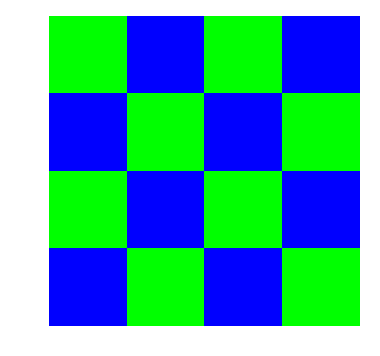

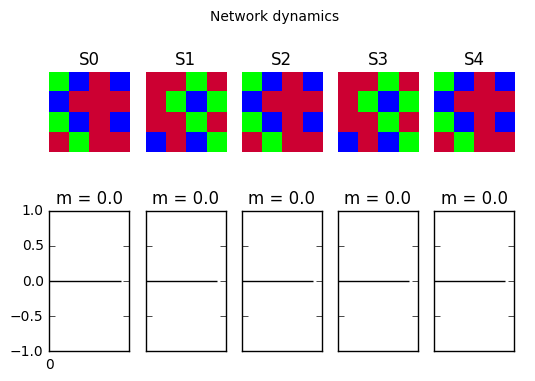

In [3]:
# setting the size of the patterns (pattern_size x pattern_size)
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size ** 2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()

# plot the checkerboard pattern
plot_tools.plot_pattern(checkerboard)

# let the Hopfield network "learn" the patterns. note: the patterns aren't stored explicitly,
# only network weights are updated
hopfield_net.store_patterns([checkerboard])

# create a noisy version of a pattern and use it to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it into the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [checkerboard], reference_idx=0, suptitle="Network dynamics")

### With *nr\_flipped\_pixels* = 10...

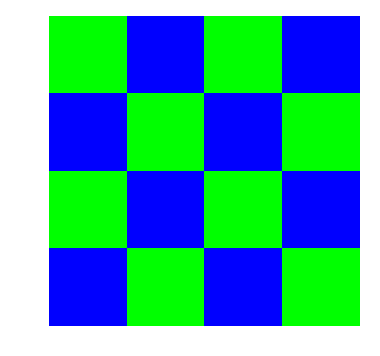

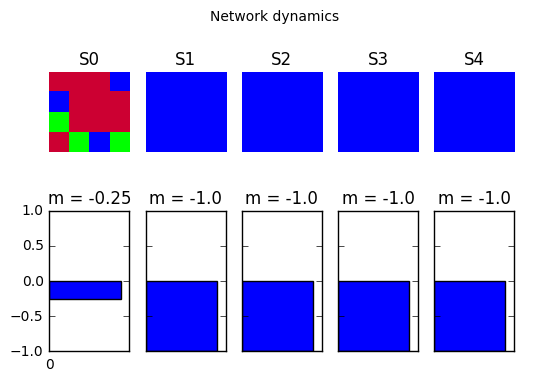

In [4]:
# setting the size of the patterns (pattern_size x pattern_size)
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size ** 2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()

# plot the checkerboard pattern
plot_tools.plot_pattern(checkerboard)

# let the Hopfield network "learn" the patterns. note: the patterns aren't stored explicitly,
# only network weights are updated
hopfield_net.store_patterns([checkerboard])

# create a noisy version of a pattern and use it to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=10)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it into the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [checkerboard], reference_idx=0, suptitle="Network dynamics")

When *nr\_flipped\_pixels* = 5, the Hopfield network is able to recover the stored checkerboard pattern. When *nr\_flipped\_pixels* = 8, the network dynamics evolve, but it's unable to converge to the stored pattern. Finally, when *nr\_flipped\_pixels* = 10, the network converges to all -1 values quickly and stays there.

### 8.3.2. Question: The weights matrix

The patterns a Hopfield network learns are not explicitly stored. Instead, the network learns by adjusting the weights to the pattern set it is presented during learning. We visualize this.

1. Create a new 4x4 Hopfield network. Do not yet store any patterns.
2. What is the size of the network matrix? _The size of the network matrix is 4x4._
3. Visualize the weight matrix using the function *plot\_tools.plot\_network_weights()*. It takes the network as a parameter.
4. Create a checkerboard and store it in the network.
5. Plot the weights matrix. What weight values occur? _0's along the main diagonal, and various -0.05's and 0.05's elsewhere_.
6. Create a new 4x4 Hopfield network.
7. Create an L-shaped pattern (look at the pattern factory documentation) and store it in the network.
8. Plot the weights matrix. What weight values occur? _0's along the main diagonal, and various -0.05's and 0.05's elsewhere_.
9. Create a new 4x4 Hopfield network.
10. Create a checkerboard and an L-shaped pattern. Store both patterns in the network.
11. Plot the weights matrix. What weight values occur? How does this matrix compare to the two previous matrices? _0's along the main diagonal and mostly elsewhere, with -0.1's and 0.1's elsewhere in minority_.

Note: The mapping of the 2D patterns onto the 1D list of network neurons is internal to the implementation of the Hopfield network. You cannot know which pixel (x, y) in the pattern corresponds to which Hopfield network neuron $i$.

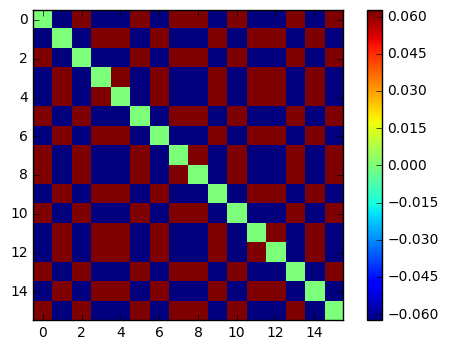

In [5]:
# setting the size of the patterns (pattern_size x pattern_size)
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net1 = network.HopfieldNetwork(nr_neurons=pattern_size ** 2)
# plotting the initial weights of the created hopfield network
plot_tools.plot_nework_weights(hopfield_net)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

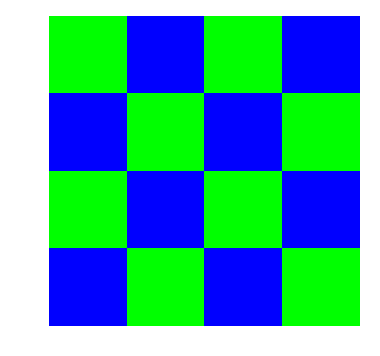

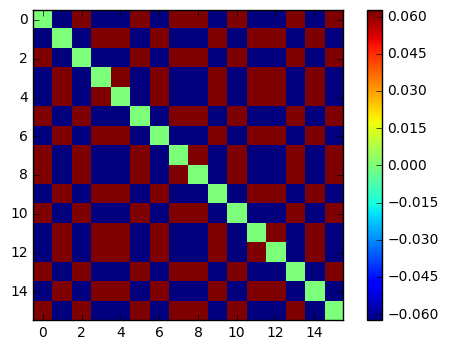

In [6]:
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
# plot the checkerboard pattern
plot_tools.plot_pattern(checkerboard)
# let the Hopfield network "learn" the checkerboard pattern
hopfield_net1.store_patterns([checkerboard])
# plotting the network weights after learning the checkerboard pattern
plot_tools.plot_nework_weights(hopfield_net1)

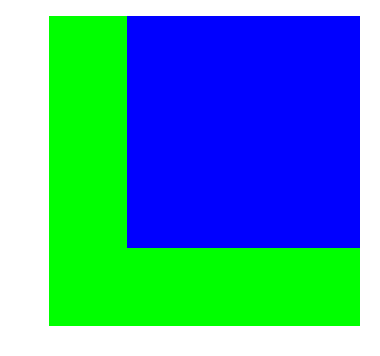

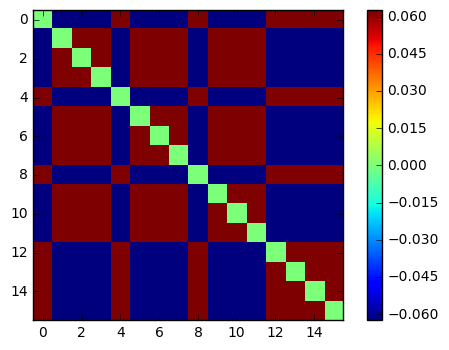

In [7]:
# create an instance of the class HopfieldNetwork
hopfield_net2 = network.HopfieldNetwork(nr_neurons=pattern_size ** 2)
# create a L-shaped pattern and add it to the pattern list
l_pattern = factory.create_L_pattern()
# plot the checkerboard pattern
plot_tools.plot_pattern(l_pattern)
# let the Hopfield network "learn" the L-shaped pattern
hopfield_net2.store_patterns([l_pattern])
# plotting the network weights after learning the L-shaped pattern
plot_tools.plot_nework_weights(hopfield_net2)

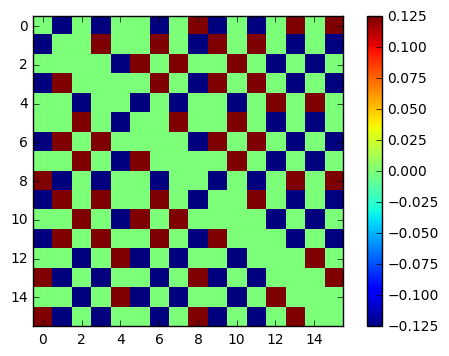

In [8]:
# create an instance of the class HopfieldNetwork
hopfield_net3 = network.HopfieldNetwork(nr_neurons=pattern_size ** 2)
# let the Hopfield network "learn" both the checkerboard and L-shaped patterns
hopfield_net3.store_patterns([checkerboard, l_pattern])
# plotting the network weights after learning both patterns
plot_tools.plot_nework_weights(hopfield_net3)

### 8.3.3. Weights distribution

It's interesting to look at the weights distribution in the three previous cases. We can plot a histogram easily by doing the following.

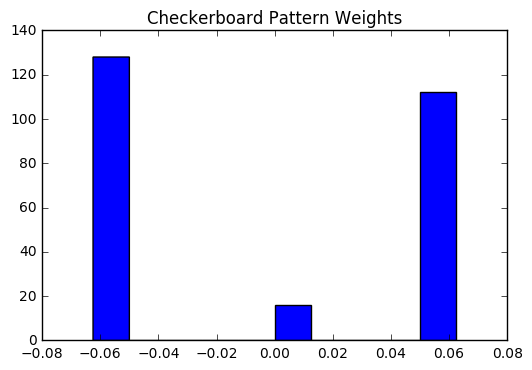

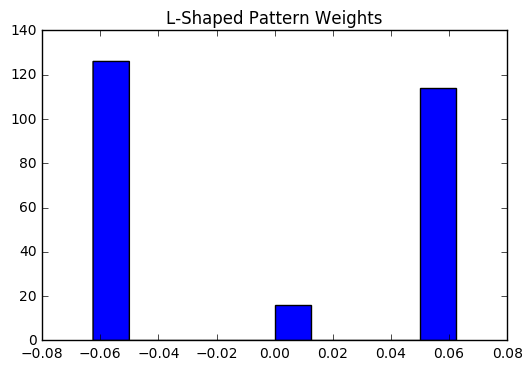

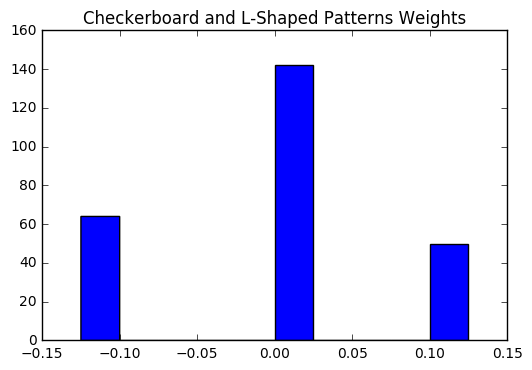

In [9]:
plt.figure()
plt.title('Checkerboard Pattern Weights')
plt.hist(hopfield_net1.weights.flatten());
plt.figure()
plt.title('L-Shaped Pattern Weights')
plt.hist(hopfield_net2.weights.flatten());
plt.figure()
plt.title('Checkerboard and L-Shaped Patterns Weights')
plt.hist(hopfield_net3.weights.flatten());

## 8.4. Exercise: Capacity of an 100 Neuron Hopfield Network

Larger Hopfield networks can store more bit patterns. There is a theoretical limit: the capacity of a Hopfield network. [Chapter 17.2.4 ("Memory capacity")](http://neuronaldynamics.epfl.ch/online/Ch17.S2.html) contains information about how memory retrieval, pattern completion, and the network's capacity are related.

### 8.4.1. Question:

A Hopfield network implements a so-called __associative__ or __content-adressable__ memory. Explain what this means. ___associative__ or __content-addressable__ memory refers to the phenomenon in which patterns are stored by their identity; i.e., one can retrieve patterns from such a type of memory by provided a similar or noisy version of the pattern, and letting the memory "relax" into the nearest neighboring stored pattern._

### 8.4.2. Question:

Using the value $C_{store}$ given in the book, how many patterns can you store in a $N = 10 \times 10$ network? Use this number $\mathbf{K}$ in the next question: _Using $C_{store} = 0.138$ and $N = 10 \times 10 = 100$, $K = 100 * 0.138 = 13.8 > 13$ patterns._

### 8.4.3. Question:

Create an $N = 10 \times 10$ Hopfield network and store a checkerboard pattern together with $(K - 1)$ random patterns. Then, initialize the network with the unchanged checkerboard pattern. Let the network evolve for five iterations.

Re-run your script a few times. What do you observe? _Sometimes the checkerboard pattern stays as a fixed point in the dynamics, and other times, the dynamics drift away by a few pixel flips._

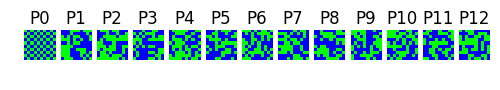

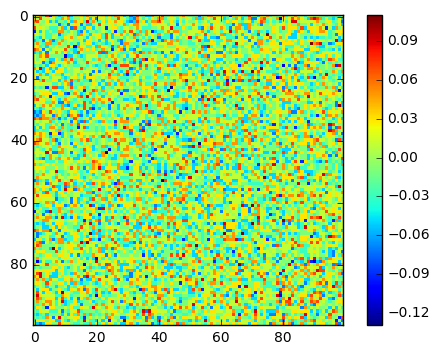

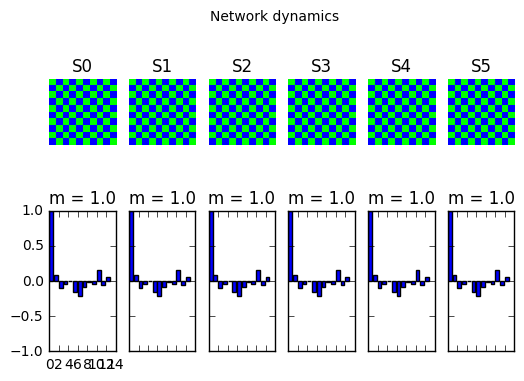

In [14]:
# create an instance of the class HopfieldNetwork
hopfield_net4 = network.HopfieldNetwork(nr_neurons=10 ** 2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(10, 10)
# create checkerboard pattern
checkerboard = factory.create_checkerboard()

# create pattern list
pattern_list = [checkerboard]
# add (K - 1) random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=12, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

# let the Hopfield network "learn" both the checkerboard and L-shaped patterns
hopfield_net4.store_patterns(pattern_list)
# plotting the network weights after learning both patterns
plot_tools.plot_nework_weights(hopfield_net4)

# initialize the network with the checkerboard pattern
hopfield_net4.set_state_from_pattern(checkerboard)
# let the network evolve for 5 iterations and store the resultant states
states = hopfield_net4.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it into the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")